# Task 1. EDA

Рассмотрим датасет пациентов с заболеваниями сердца, который можно посмотреть [тут](https://archive.ics.uci.edu/dataset/45/heart+disease).

Описание датасета:
- **age** ––– Возраст пациента
- **sex** ––– Пол пациента
- **cp** --- тип грудной боли
        -- Value 1: типичная стенокардия
        -- Value 2: атипичная стенокардия
        -- Value 3: не стенокардия
        -- Value 4: asymptomatic
- **trestbps** ––– Артериальное давление в состоянии покоя
- **chol** –––	уровень холестерина в сыворотке крови в мг/дл
- **fbs** –––	 (Уровень сахара в крови натощак > 120 mg/dl)  (1 = true; 0 = false)
- **restecg** ––– Результаты электрокардиографии в состоянии покоя
   - Value 0: normal (Сердце в покое работает штатно)
   - Value 1: having ST-T wave abnormality (Подозрение на ишемию или проблемы с кровотоком прямо сейчас)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria (Свидетельство долгосрочных проблем: давление, износ мышцы)
- **thalach** ––– Максимальная наблюдаемая частота сердечных сокращений	
- **exang** ––– Стенокардия была вызвана физическими упражнениям (1 = yes; 0 = no)	
- **oldpeak** ––– Снижение сегмента ST, вызванное физической нагрузкой, по сравнению с состоянием покоя (Это часто является признаком ишемии миокарда, основной причиной которой является коронарная недостаточность)
- **slope** ––– наклон пикового сегмента ST во время физической нагрузки
   - Value 1: восходящий
   - Value 2: плоский
   - Value 3: нисходящий
- **ca** ––– Количество крупных сосудов (0-3), окрашенных рентгеноскопией
- **thal** ––– Результаты теста, показывающего, насколько хорошо кровь поступает к сердечной мышце в покое и при нагрузке.
   - Normal (3). Кровоток в сердце в норме и при нагрузке, и в покое
   - Fixed defect (6). Область сердца не получает кровь ни при нагрузке, ни в покое. Обычно это указывает на наличие рубцовой ткани после перенесенного инфаркта
   - Reversible Defect (7). Кровоток в покое нормальный, но при физической нагрузке он значительно ухудшается. Это классический признак ишемической болезни сердца (сужение артерий).
- **num** ––– диагноз, наличие сердечного заболевания разной степени тяжести (0, 1, 2, 3, 4).

- [X] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [X] Считать данные и вывести их основные характеристики, описание признаков.
- [X] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [X] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [X] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [X] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [X] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).


In [1]:
from ucimlrepo import fetch_ucirepo

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения


In [2]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [3]:
# Удалим некоторые диангозны (3% всех строк) и попробуем в будущем их предсказать.

df = pd.concat([X, y], axis=1)

# Формируем столбец на основе num, в котором спрячем некоторые диангозы
df['num_hidden'] = df['num'].copy()

# 3. Удаляем 3% значений в новом столбце
random_indices = df.sample(frac=0.03, random_state=42).index
df.loc[random_indices, 'num_hidden'] = np.nan

df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            4
thal          2
num           0
num_hidden    9
dtype: int64

Будем предсказывать "скрытые" диагнозы в столбце num_hidden, а затем сравним результаты с реальными значениями.

### Первичный анализ признаков

Для начала рассмотрим:
1. Количественные признаки age, thalach
2. Порядковый признак restecg
3. Категориальный признак sex

Далее соотношение:
пол --- возраст --- диагноз (violin)

In [4]:
sex_num = df.groupby(['sex', 'num'])['sex'].count()
print(sex_num)

sex  num
0    0      72
     1       9
     2       7
     3       7
     4       2
1    0      92
     1      46
     2      29
     3      28
     4      11
Name: sex, dtype: int64


In [5]:
print(f"Количество объектов: {df.shape[0]}")
print(f"Количество мужчин: {df[df['sex'] == 1].shape[0]}")
print(f"Количество женщин: {df[df['sex'] == 0].shape[0]}")
print(f"Доля диагнозов \"Normal\" у мужчин: \
      {sex_num[0, 0] / df[df['sex'] == 1].shape[0]}")
print(f"Доля диагнозов \"Normal\" у женщин: \
      {sex_num[1, 0] / df[df['sex'] == 0].shape[0]}")

Количество объектов: 303
Количество мужчин: 206
Количество женщин: 97
Доля диагнозов "Normal" у мужчин:       0.34951456310679613
Доля диагнозов "Normal" у женщин:       0.9484536082474226


Возраст женщин:
count    206.000000
mean      53.834951
std        8.836838
min       29.000000
25%       47.000000
50%       54.500000
75%       59.750000
max       77.000000
Name: age, dtype: float64
Возраст мужчин:
count    97.000000
mean     55.721649
std       9.370546
min      34.000000
25%      50.000000
50%      57.000000
75%      63.000000
max      76.000000
Name: age, dtype: float64


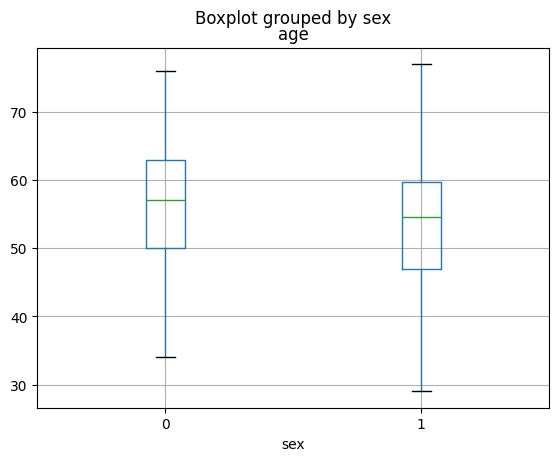

In [6]:
# Возраст мужчин и женщин:
print("Возраст женщин:")
print(df[df['sex'] == 1]['age'].describe())
print("Возраст мужчин:")
print(df[df['sex'] == 0]['age'].describe())

df.boxplot(column="age", by="sex")
plt.show()

Для данной выборки характерно то, что у мужчин на 60% чаще, чем у женщин, диагностируются сердечные заболевания какой-либо тяжести. При этом различие в возрасте между половыми группами невелико: разница медианы и среднего < 5%

Построим диаграмму соотношения пол --- возраст --- диагноз.
Для этого сделаем из порядкового признака "num", обозначающего тяжесть заболевания, категориальный признак "has_disease", обозначающего только наличие заболевания.

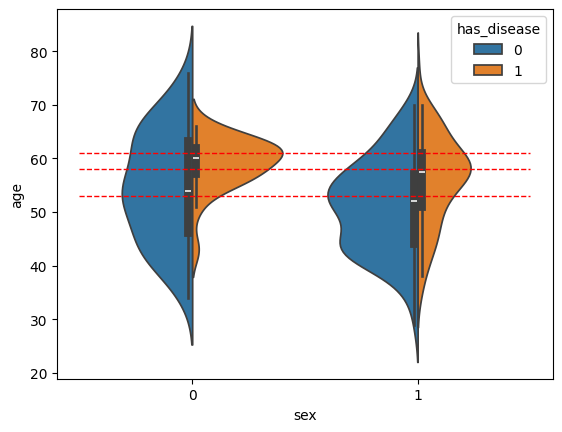

In [7]:
df['has_disease'] = (df['num'] > 0).astype(int)
ax = sns.violinplot(x="sex", y="age", hue="has_disease", data=df, split=True)
ax.hlines(y=53, xmin=-0.5, xmax=1.5, 
                      color='red', linestyle='--', linewidth=1)
ax.hlines(y=58, xmin=-0.5, xmax=1.5, 
                      color='red', linestyle='--', linewidth=1)
ax.hlines(y=61, xmin=-0.5, xmax=1.5, 
                      color='red', linestyle='--', linewidth=1)
plt.show()

Из графика видно, что пик количества заболеваний среди мужчин (61) и женщин (58) различается примерно на столько же, на сколько различается средний возраст или медиана в выборке. После этого у мужчин наблюдается резский спад, в то время как у женщин --- пологий. Возможно, это связано с фатальными исходами. Однако если посмотреть на левую часть диаграмм, то есть на количество мужчин и женщин без болезни сердца, то можно заметить, что у мужчин распределение более "плавное", что говорит о том, что если болезнь не была диагностирована ранее, то вероятность обнаружения ее в более позднем возрасте меньше, чем у женщин.

Проанализируем количественный признак thalach (Максимальная наблюдаемая частота сердечных сокращений)

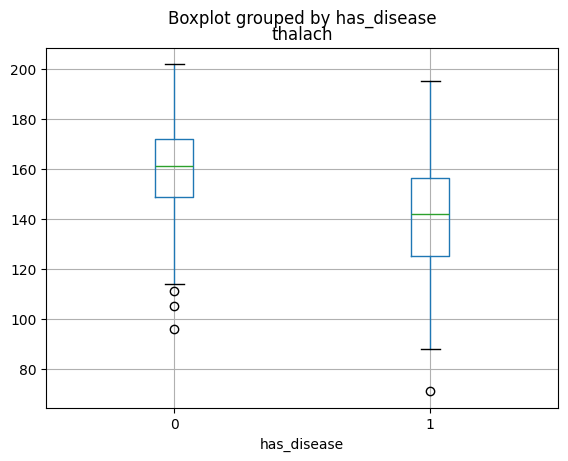

In [8]:
df.boxplot(column="thalach", by="has_disease")
plt.show()

В случае наличия заболевания медиана максимальной частоты сердечных сокращений меньше на 20 единиц.

Посмотрим на restecg (результаты электрокардиографии в состоянии покоя)

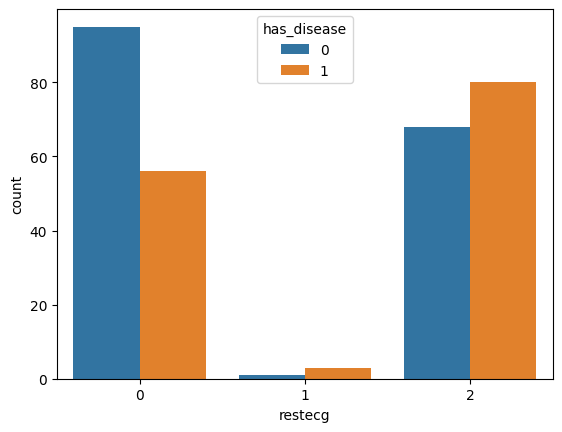

In [9]:
sns.countplot(data=df, x='restecg', hue='has_disease')
plt.show()

Ненормальные результаты ЭКГ не гарантируют того, что диагноз подтвердится. Однако если ЭКГ показывает нормальные результаты, то примерно в 60% случаях болезнь действительно отсутствует.

### Корреляция признаков

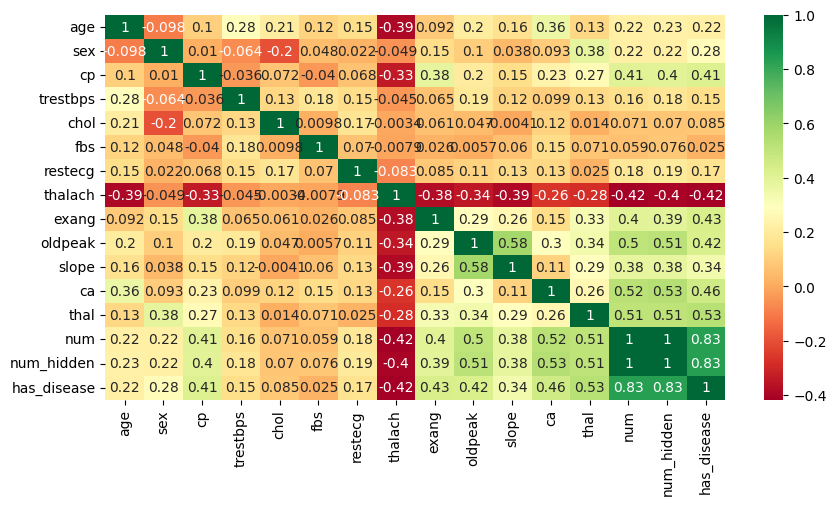

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Наблюдается значительная положительная корреляция между thal и num_hidden (или has_disease), ca и num_hidden, oldpeak и num_hidden, cp и num_hidden, age и num_hidden. Отрицательная корреляция между thalach и num_hidden.

Задача предсказания: необходимо запонить недостающие значения thal, ca (можно предсказывать по num_hidden, thalach, oldpeak) и num_hidden (для предсказания можно использовать thal, ca, oldpeak, age, cp, thalach).

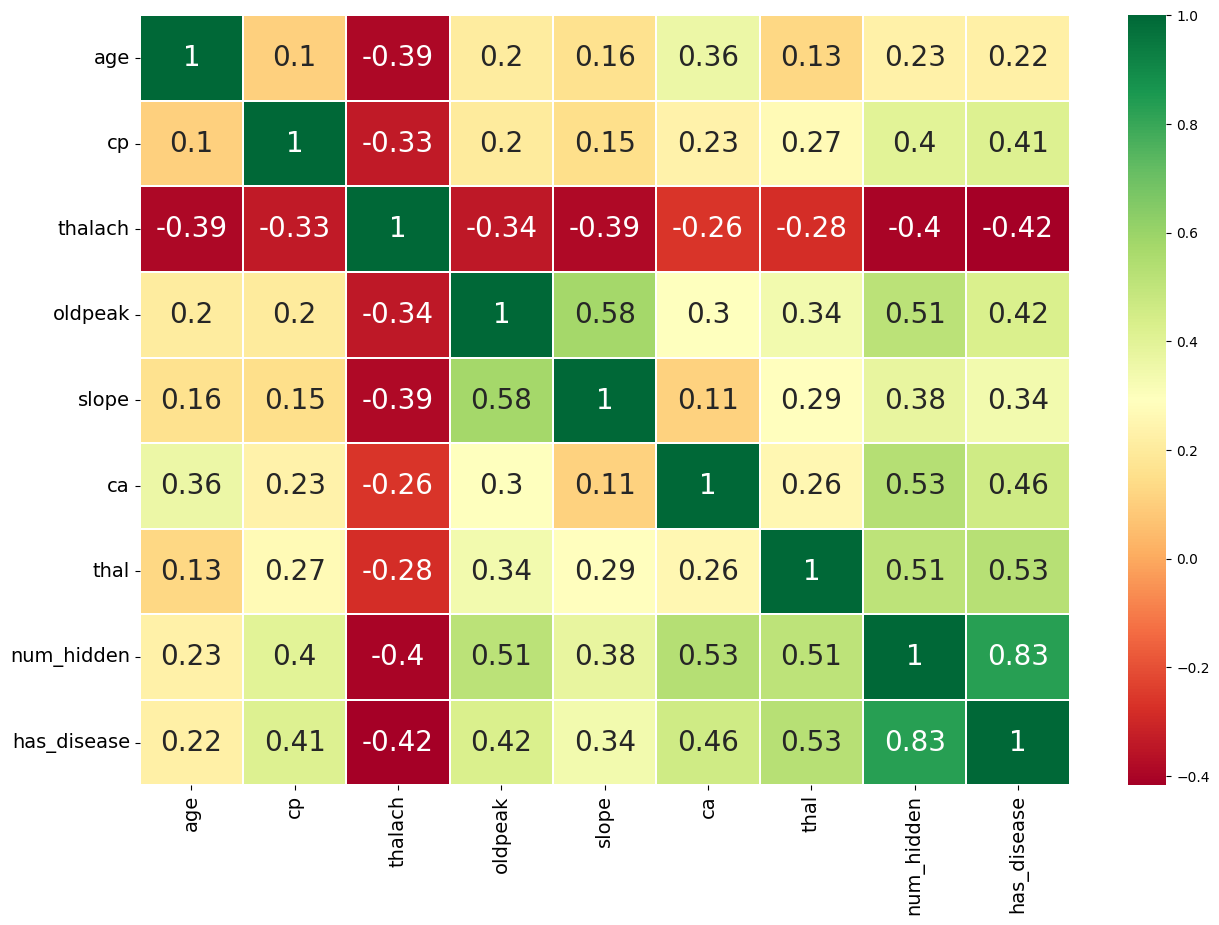

In [11]:
# Удалим столбцы, которые не будут использованы для предсказаний и num,
# потому что вместо него используем num_hidden с искусственно спрятанными значениями

df.drop(['trestbps', 'chol', 'fbs', 'restecg', 'exang', 'sex', 'num'], axis=1, inplace=True)
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()